Здесь протестируем и отдебажим готовые классы и функции для создания круговых диаграмм для изображения, а также круговой диаграммы агента и взаимодействия с ними.

Сначала проверим, работает ли всё, что нужно вообще, а потом уже будем тестировать на конкретных кейсах.

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
import cv2

# 1
from openstreetmap_load_data import find_objects_bounds, load_data_from_openstreetmap
from utils import calculate_right_top_coordinates
from google_api_load_data import load_prepare_and_cut_image
from osm_object import One_OSM_object, Image_OSM_object

# 2, 3
from circle_diagram import Image_circle_diagrams, Agent_circle_diagram, calculate_sectors_count, create_circle_diagram

# 4
from circle_diagram import select_minimum_penalty_element_grid

# tests
from rectangles_drawing import calculate_one_pixels_diffs, draw_all_rectangles

**1. Загружаем картинку и формируем из неё Image_OSM_object**

In [2]:
left_bottom_lat = 54.4081
left_bottom_lon = 48.980
right_top_lat, right_top_lon = calculate_right_top_coordinates(left_bottom_lat, left_bottom_lon)

datafile_name = "tmp.json"

load_data_from_openstreetmap(left_bottom_lat, left_bottom_lon, right_top_lat, right_top_lon, datafile_name)
bounds, tags = find_objects_bounds(datafile_name, right_top_lat, right_top_lon, left_bottom_lat, left_bottom_lon)

img_cutted_satellite = load_prepare_and_cut_image(left_bottom_lat=left_bottom_lat, left_bottom_lon=left_bottom_lon,
                                                  right_top_lat=right_top_lat, right_top_lon=right_top_lon,
                                                  is_debug=False)

In [3]:
img_osm_1 = Image_OSM_object(img_cutted_satellite.shape, right_top_lat, right_top_lon,
                             left_bottom_lat, left_bottom_lon, bounds, tags)

In [4]:
# Один из объектов на изображении
img_osm_1.osm_objects[0].print_osm_object()

maxlat: 25, minlat: 40, maxlon: 116, minlon: 84


**2. Создаём множество круговых диаграмм для всего изображения**

In [5]:
bigger_side_blocks_count = 10

sectors_count = calculate_sectors_count(bigger_side_blocks_count)
print("Sectors count:", sectors_count)

Sectors count: 1018


In [6]:
img_cd = Image_circle_diagrams(img_osm_1, bigger_side_blocks_count, sectors_count)

**3. Создаём круговую диаграмму агента**

In [7]:
agent_cd = Agent_circle_diagram(sectors_count)

In [8]:
agent_cd.insert(50, 60, 2, 'water')
agent_cd.insert(30, 60, 1, 'wood')
agent_cd.insert(100, 120, 1, 'water')
agent_cd.insert(65, 90, 1, 'water')

agent_cd.resort_sectors()

**4. Определим наиболее вероятный элемент сетки на изображении, в котором находится агент**

In [9]:
%%time
center_point, index = select_minimum_penalty_element_grid(img_cd, agent_cd)

Wall time: 2min 8s


In [10]:
print(center_point)
print(index)

[(140.0, 340.0)]
[38]


Итак, отдебажили, теперь работает, но неизвестно, правильно ли, попробуем это выяснить.

## Тесты

In [11]:
def load_all_image_info(left_bottom_lat, left_bottom_lon, data_path, image_path):
    right_top_lat, right_top_lon = calculate_right_top_coordinates(left_bottom_lat, left_bottom_lon)
    
    load_data_from_openstreetmap(left_bottom_lat, left_bottom_lon, right_top_lat, right_top_lon, data_path)
    bounds, tags = find_objects_bounds(datafile_name, right_top_lat, right_top_lon, left_bottom_lat, left_bottom_lon)
    
    img_cutted_satellite = load_prepare_and_cut_image(left_bottom_lat=left_bottom_lat, left_bottom_lon=left_bottom_lon,
                                                  right_top_lat=right_top_lat, right_top_lon=right_top_lon,
                                                  is_debug=False)
    cv2.imwrite(image_path, img_cutted_satellite)
    
    return img_cutted_satellite, bounds, tags, right_top_lat, right_top_lon

In [12]:
left_bottom_lat = 54.3
left_bottom_lon = 48.6

img_cutted_satellite, bounds, tags, right_top_lat, right_top_lon = load_all_image_info(
    left_bottom_lat=left_bottom_lat, left_bottom_lon=left_bottom_lon, data_path="jsons/42.json", image_path="images/42.png")

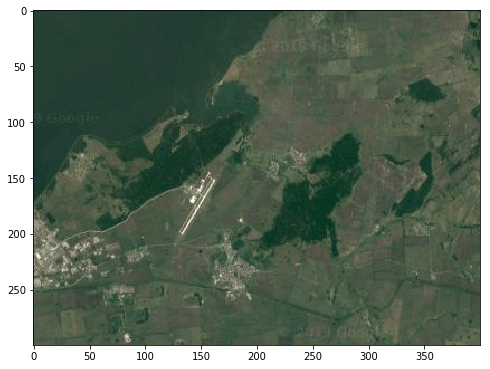

In [13]:
plt.figure(figsize=(8, 10))
plt.imshow(cv2.cvtColor(img_cutted_satellite, cv2.COLOR_BGR2RGB))
plt.show()

In [14]:
def create_diagrams(left_bottom_lat, left_bottom_lon, right_top_lat, right_top_lon, bounds, tags, bigger_side_blocks_count,
                   agent_point):
    img_osm = Image_OSM_object(img_cutted_satellite.shape, right_top_lat, right_top_lon,
                             left_bottom_lat, left_bottom_lon, bounds, tags)
    sectors_count = calculate_sectors_count(bigger_side_blocks_count)
    
    img_cd = Image_circle_diagrams(img_osm, bigger_side_blocks_count, sectors_count)
    agent_cd = create_circle_diagram(sectors_count, agent_point, img_osm)
    
    return img_cd, agent_cd

In [15]:
img_cd, agent_cd = create_diagrams(left_bottom_lat, left_bottom_lon, right_top_lat, right_top_lon, bounds, tags, 4, (120, 120))

In [16]:
img_cd.circle_diagrams[0].sectors

[[(54.405882034941776, 'wood'),
  (59.464274989274024, 'wood'),
  (62.24146527838174, 'wood'),
  (71.55417527999327, 'wood')],
 [(71.55417527999327, 'wood')],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [(51.62363799656123, 'wood')],
 [(51.62363799656123, 'wood')],
 [(51.62363799656123, 'wood')],
 [(51.62363799656123, 'wood')],
 [(51.62363799656123, 'wood')],
 [(51.62363799656123, 'wood')],
 [(51.62363799656123, 'wood')],
 [(6.4031242374328485, 'wood'),
  (14.422205101855956, 'wood'),
  (51.62363799656123, 'wood')],
 [(6.4031242374328485, 'wood'),
  (14.422

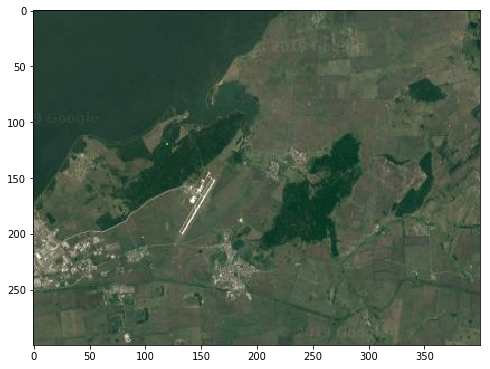

In [17]:
agent_point = (120, 120)
img_cutted_satellite[agent_point[0] - 1: agent_point[0] + 1, agent_point[1] - 1 : agent_point[1] + 1] = [[0, 255, 0] for _ in range(2)]
plt.figure(figsize=(8, 10))
plt.imshow(cv2.cvtColor(img_cutted_satellite, cv2.COLOR_BGR2RGB))
plt.show()

0 water
1 water
2 wood
3 wood
4 wood
5 wood
6 wood
7 wood
8 wood
9 wood
10 wood
11 wood
12 wood
13 wood
14 wood
15 wood
16 wood
17 wood
18 wood
19 wood
20 wood
21 wood
22 wood
23 wood
24 wood
25 wood
26 wood
27 wood
28 wood
29 wood
30 wood
31 wood
32 wood
33 wood
34 wood
35 wood
36 wood
37 wood
38 wood
39 wood
40 wood
41 wood
42 wood
43 wood
44 wood
45 wood
46 wood
47 wood
48 wood
49 wood
50 wood
51 wood
52 wood
53 wood
54 wood
55 wood
56 wood
57 wood
58 wood
59 wood
60 wood
61 wood
62 wood
63 wood
64 wood
65 wood
66 wood
67 wood
68 wood
69 wood
70 wood
71 wood
72 wood
73 wood
74 wood
75 wood
76 wood
77 wood
78 wood
79 wood
80 wood
81 wood
82 wood
83 wood
84 wood
85 wood
86 wood
87 wood
88 wood
89 wood
90 wood
91 wood
92 wood
93 wood
94 wood
95 wood
96 wood
97 wood
98 wood
99 wood
100 wood


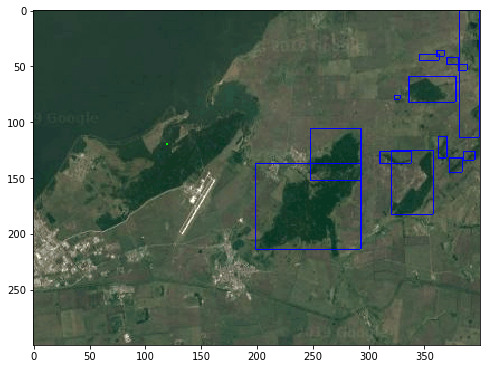

In [18]:
one_pixel_lat_diff, one_pixel_lon_diff = calculate_one_pixels_diffs(right_top_lat, right_top_lon,
                                                                    left_bottom_lat, left_bottom_lon,
                                                                    img_cutted_satellite.shape)
img_result = draw_all_rectangles(img_cutted_satellite, bounds, tags,
                                 right_top_lat, right_top_lon, left_bottom_lat, left_bottom_lon,
                                 one_pixel_lat_diff, one_pixel_lon_diff)
plt.figure(figsize=(8, 10))
plt.imshow(cv2.cvtColor(img_result, cv2.COLOR_BGR2RGB))
plt.show()

In [19]:
# Пока круговая диаграмма агента выглядит довольно формально, потом её подкорректируем
agent_cd.sectors

[[(102.17631819555841, 'wood'), (105.3612832116238, 'wood')],
 [(102.17631819555841, 'wood')],
 [(102.17631819555841, 'wood'), (124.47088012864695, 'wood')],
 [(102.17631819555841, 'wood'),
  (124.47088012864695, 'wood'),
  (163.3431969810803, 'wood')],
 [(102.17631819555841, 'wood'),
  (124.47088012864695, 'wood'),
  (158.41717078650282, 'wood'),
  (159.81239000778382, 'wood')],
 [(102.17631819555841, 'wood'),
  (152.97058540778355, 'wood'),
  (158.41717078650282, 'wood'),
  (161.22654868228122, 'wood')],
 [(102.17631819555841, 'wood'),
  (152.97058540778355, 'wood'),
  (161.22654868228122, 'wood')],
 [(102.17631819555841, 'wood')],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 []

In [25]:
%%time
center_points, indexes = select_minimum_penalty_element_grid(img_cd, agent_cd)
print(center_points)
print(indexes)

[(50.0, 150.0)]
[1]
Wall time: 255 ms


In [21]:
# Теперь нарисуем на изображении прямоугольник, соответствующий определённому элементу сетки

In [26]:
bigger_side_blocks_count = 4
bigger_side = max(img_cutted_satellite.shape[0], img_cutted_satellite.shape[1])
one_block_len = bigger_side / bigger_side_blocks_count
print(one_block_len)
half = one_block_len / 2

100.0


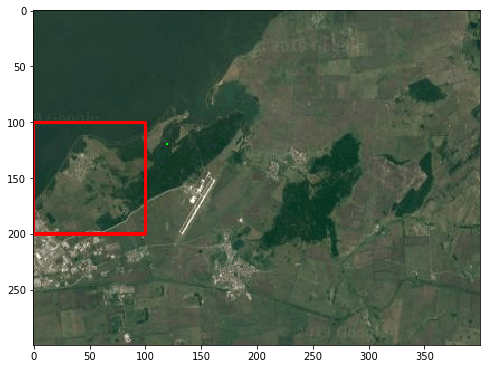

In [27]:
img_result_show = img_cutted_satellite.copy()

for center_point in center_points:
    cv2.rectangle(img_result_show,
                 (int(center_point[0] - half), int(center_point[0] + half)),
                 (int(center_point[1] - half), int(center_point[1] + half)), (0, 0, 255), 2)

plt.figure(figsize=(8, 10))
plt.imshow(cv2.cvtColor(img_result_show, cv2.COLOR_BGR2RGB))
plt.show()

In [ ]:
# Надо теперь разобраться, почему так получилось... Почему квадрат оказался не тот

In [ ]:
# TODO: попробовать нарисовать окружность с центром в точке center_point и с радиусом - длина диагонали квадрата